In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf 
import datetime
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data1 = pd.read_csv("country_vaccinations.csv")

In [ ]:
data1.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
marge=data1.groupby(['country']).sum()
marge.head()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
country                                                                       
Afghanistan         118041426.0         98211047.0               77716749.0   
Albania             295540465.0        149987489.0              123869592.0   
Algeria             238946062.0        136020513.0               98696382.0   
Andorra               2447643.0          1255700.0                 915747.0   
Angola              388740243.0        249887443.0              124201062.0   

             daily_vaccinations_raw  daily_vaccinations  \
country                                                   
Afghanistan                 13742.0           5741998.0   
Albania                   1417691.0           2748980.0   
Algeria                    170786.0          13697360.0   
Andorra                      4802.0            151499.0   
Angola                          0.0          17435547.0   

             total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
country                                                                      
Afghanistan                          296.37                         246.54   
Albania                            10287.08                        5220.72   
Algeria                              535.57                         304.85   
Andorra                             3164.23                        1623.34   
Angola                              1145.63                         736.40   

             people_fully_vaccinated_per_hundred  \
country                                            
Afghanistan                               195.08   
Albania                                  4311.65   
Algeria                                   221.21   
Andorra                                  1183.86   
Angola                                    366.00   

             daily_vaccinations_per_million  
country                                      
Afghanistan                        144138.0  
Albania                            956832.0  
Algeria                            306959.0  
Andorra                           1958503.0  
Angola                             513813.0

# The heat map below describes the total vaccinations number per countries in the world


In [ ]:
data = dict(
            type = 'choropleth',
            locations = marge.index,
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'edge',
            text=data1['iso_code'].unique(),
            z=marge.total_vaccinations,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width =0.50)),
            colorbar = {'title':'Total Vaccinations','len':1,'lenmode':'fraction'})

#initializing the layout variable
layout = dict(geo = dict(
    showframe = False,
    showcoastlines = False,
    projection_type= 'equirectangular'),
              title_text = 'Total Vaccinations per countries in the world',
              title_font = dict(size = 18, family = 'Balto',color = 'DarkBlue'),
              title_x = 0.5
             )
# Initializing the Figure object by passing data and layout as arguments.
col_map = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map)

The heat map below describes the total vaccinations per houndred number per countries in the world

In [ ]:
data = dict(
            type = 'choropleth',
            locations = marge.index,
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'burgyl',
            text= data1['iso_code'].unique(),
            z=marge.total_vaccinations_per_hundred,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width =0.50)),
            colorbar = {'title':'total_vaccinations_per_hundred','len':1,'lenmode':'fraction'})

#initializing the layout variable
layout = dict(geo = dict(
    showframe = False,
    showcoastlines = False,
    projection_type= 'equirectangular'),
              title_text = 'Total Vaccinations per countries in the world(total_vaccinations_per_hundred)',
              title_font = dict(size = 18, family = 'Balto',color = 'DarkBlue'),
              title_x = 0.5
             )
# Initializing the Figure object by passing data and layout as arguments.
col_map = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map)

The heat map below describes the total people vaccinatated per houndred number per countries in the world

In [ ]:
data = dict(
            type = 'choropleth',
            locations = marge.index,
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'haline',
            text=data1['iso_code'].unique(),
            z=marge.people_fully_vaccinated,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width =0.50)),
            colorbar = {'title':'people_fully_vaccinated','len':1,'lenmode':'fraction'})

#initializing the layout variable
layout = dict(geo = dict(
    showframe = False,
    showcoastlines = False,
    projection_type= 'equirectangular'),
              title_text = 'Total Vaccinations per countries',
              title_font = dict(size = 18, family = 'Balto',color = 'DarkBlue'),
              title_x = 0.5
             )
# Initializing the Figure object by passing data and layout as arguments.
col_map = gobj.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map)

the line graph below describes an evolution through time and the number of people which are vaccinated more than 115 000 at that specific moment 

In [ ]:
spread = data1[data1['people_vaccinated'] > 120000].groupby('date')['country'].nunique()
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='date', y='country',
              title='Number of Countries where number of people who are vaccinated more than 115000',
            )
fig.update_traces(textposition='top center')
fig.show()

The number of daily vaccinations per coutries through time

In [ ]:
def dateVacination(countryCode):
    
    dfA = data1[data1['iso_code'] == countryCode]
    liste = list(set(dfA['country']))

    fig = px.scatter(x=dfA['date'] , y=dfA['daily_vaccinations'],title='Name of the Country: {}'.format(liste[0]))

    fig.show()
    

liste = list(set(data1['iso_code']))

for i in range(10):
    source_code = liste[i]
    dateVacination(source_code)

the number of daily vaccinations and people vaccinated though time

In [ ]:
fig = make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data1['date'],y=data1['total_vaccinations'],name='total vaccinations' ),secondary_y=False,)
fig.add_trace(go.Scatter(x=data1['date'],y=data1['people_vaccinated'],name='people_vaccinated'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="Daily Vaccination and People Vaccinated")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Vaccinated",secondary_y=False)
fig.show()

Most common type of used vaccines


(-0.5, 399.5, 199.5, -0.5)

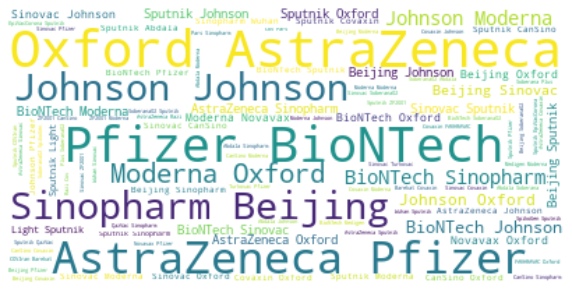

In [ ]:
tweet_All = " ".join(review for review in data1["vaccines"])
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.axis('off')

Drop the columns which are not representative

In [ ]:
vacc=pd.read_csv("country_vaccinations.csv")
vacc.drop(['source_name','source_website'], inplace=True, axis=1)

Dropping columns with no "total vaccinations" value

In [ ]:
vacc = vacc.drop(vacc[vacc.total_vaccinations.isna()].index)

How many countries started vaccination?

In [ ]:
print(str(len(vacc[vacc.total_vaccinations > 0].country.value_counts())) + " countries have started vaccinations")

223 countries have started vaccinations


Which countries started vaccinations first?

In [ ]:
vacc['date'] = pd.to_datetime(vacc['date'], utc=True)
vacc_start = vacc.loc[vacc[vacc.total_vaccinations > 0].groupby('country')['date'].idxmin()].sort_values('date')
vacc_start.head(5)

country iso_code                      date  total_vaccinations  \
43117         Latvia      LVA 2020-12-04 00:00:00+00:00                 1.0   
58523         Norway      NOR 2020-12-08 00:00:00+00:00                 5.0   
20826        Denmark      DNK 2020-12-08 00:00:00+00:00                 1.0   
82360  United States      USA 2020-12-13 00:00:00+00:00             30288.0   
13403         Canada      CAN 2020-12-14 00:00:00+00:00                 5.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
43117                1.0                      NaN                     NaN   
58523                5.0                      NaN                     5.0   
20826                1.0                      NaN                     NaN   
82360            25125.0                   5897.0                     NaN   
13403                5.0                      NaN                     NaN   

       daily_vaccinations  total_vaccinations_per_hundred  \
43117                 NaN                            0.00   
58523                 1.0                            0.00   
20826                 NaN                            0.00   
82360                 NaN                            0.01   
13403                 NaN                            0.00   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
43117                           0.00                                  NaN   
58523                           0.00                                  NaN   
20826                           0.00                                  NaN   
82360                           0.01                                  0.0   
13403                           0.00                                  NaN   

       daily_vaccinations_per_million  \
43117                             NaN   
58523                             0.0   
20826                             NaN   
82360                             NaN   
13403                             NaN   

                                                vaccines  
43117  Johnson&Johnson, Moderna, Novavax, Pfizer/BioN...  
58523                           Moderna, Pfizer/BioNTech  
20826          Johnson&Johnson, Moderna, Pfizer/BioNTech  
82360          Johnson&Johnson, Moderna, Pfizer/BioNTech  
13403  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...

Which countries are the most recent to start vaccinations?

In [ ]:
vacc_start.tail(5)

country iso_code                      date  total_vaccinations  \
33419     Haiti      HTI 2021-07-16 00:00:00+00:00                38.0   
78312   Tokelau      TKL 2021-08-02 00:00:00+00:00               953.0   
76935  Tanzania      TZA 2021-08-08 00:00:00+00:00            105745.0   
41329  Kiribati      KIR 2021-08-09 00:00:00+00:00             13970.0   
12494   Burundi      BDI 2021-10-19 00:00:00+00:00                81.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
33419               38.0                      NaN                     NaN   
78312              953.0                      NaN                     NaN   
76935           105745.0                 105745.0                     NaN   
41329            13970.0                      NaN                     NaN   
12494               81.0                      NaN                     NaN   

       daily_vaccinations  total_vaccinations_per_hundred  \
33419                 NaN                            0.00   
78312                23.0                           69.66   
76935                 NaN                            0.17   
41329               202.0                           11.51   
12494                 NaN                            0.00   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
33419                           0.00                                  NaN   
78312                          69.66                                  NaN   
76935                           0.17                                 0.17   
41329                          11.51                                  NaN   
12494                           0.00                                  NaN   

       daily_vaccinations_per_million  \
33419                             NaN   
78312                         16813.0   
76935                             NaN   
41329                          1664.0   
12494                             NaN   

                                                vaccines  
33419                           Johnson&Johnson, Moderna  
78312                                    Pfizer/BioNTech  
76935  Johnson&Johnson, Pfizer/BioNTech, Sinopharm/Be...  
41329                                 Oxford/AstraZeneca  
12494                                  Sinopharm/Beijing

How have the cumulative number of countries adopting covid-19 vaccinations evolved over time? How is this trend?

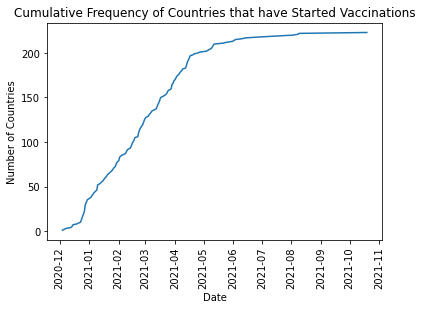

In [ ]:
events = pd.Series(vacc_start.date.value_counts())
events.index = pd.to_datetime(events.index)
events.sort_index(inplace=True)

plt.plot(events.cumsum())
plt.xticks(rotation=90)
plt.title('Cumulative Frequency of Countries that have Started Vaccinations')
plt.xlabel('Date')
plt.ylabel('Number of Countries')
plt.show()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 11.4 MB/s 
     |████████████████████████████████| 16.7 MB 60.5 MB/s 
     |████████████████████████████████| 6.3 MB 58.5 MB/s 


In [ ]:
import geopandas as gpd

Countries that have started vaccinations

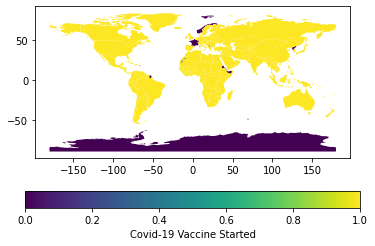

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries['score'] = 0

countries['score'] = np.where(countries.iso_a3.isin(vacc_start.iso_code), 1, 0)

countries.plot(column='score',legend=True, legend_kwds={'label': "Covid-19 Vaccine Started",'orientation': "horizontal"})
plt.show()

What is the total number of vaccinations done to date?

In [ ]:
vacc_total = vacc.loc[vacc.groupby('country')['total_vaccinations'].idxmax()].sort_values('total_vaccinations',ascending=False)
print("To date, there have been a total of ", vacc_total.total_vaccinations.sum()/1000000, " Million vaccinations adminstered")

To date, there have been a total of  11383.441962  Million vaccinations adminstered


Which countries have administered the most number of vaccines?

In [ ]:
print(vacc_total.iloc[0].country, " has administered the most vaccines, with ", vacc_total.iloc[0].total_vaccinations/1000000, " Million vaccinations to date")

China  has administered the most vaccines, with  3263.129  Million vaccinations to date


What are the top 20 countries in terms of total number of vaccines administered?

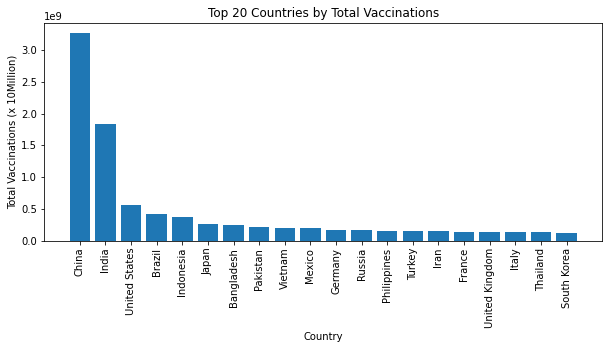

In [ ]:
plt.figure(figsize=(10, 4)) 
plt.bar(vacc_total.country[0:20], vacc_total.total_vaccinations[0:20])
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Total Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations (x 10Million)')
plt.show()

Geomap of countries that have started covid-19 vaccinations, in terms of total number of vaccinations administered

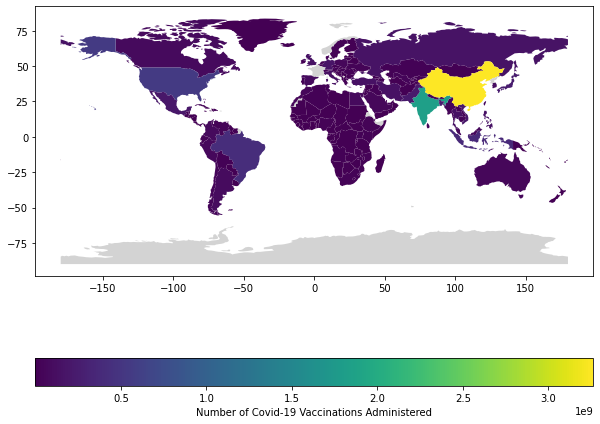

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries = countries.merge(vacc_total[['iso_code', 'total_vaccinations']], how = 'left',
                left_on = 'iso_a3', right_on = 'iso_code').drop('iso_code', axis=1)

fig, ax = plt.subplots(1, 1,figsize=(10,10))

countries.plot(column='total_vaccinations',legend=True,ax=ax, 
               legend_kwds={'label': "Number of Covid-19 Vaccinations Administered",'orientation': "horizontal"}, 
               missing_kwds={"color": "lightgrey"})
plt.show()

Which is the country with the most vaccines administered per 100 population?

In [ ]:
vacc_total = vacc.loc[vacc.groupby('country')['total_vaccinations_per_hundred'].idxmax()].sort_values('total_vaccinations_per_hundred',ascending=False)
print(vacc_total.iloc[0].country, " with ", vacc_total.iloc[0].total_vaccinations_per_hundred, " vaccines administered per 100 population, to date")

Gibraltar  with  345.37  vaccines administered per 100 population, to date


Top 20 countries with vaccines administered per 100 population

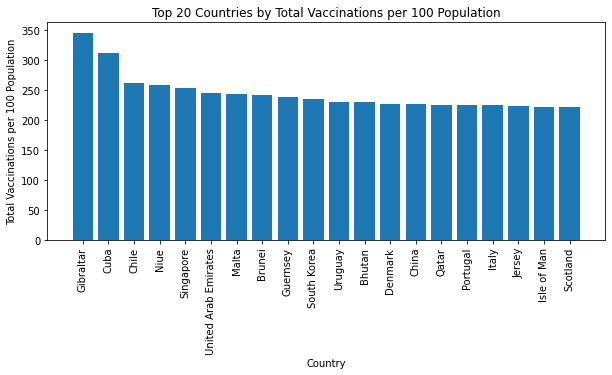

In [ ]:
plt.figure(figsize=(10, 4)) 
plt.bar(vacc_total.country[0:20], vacc_total.total_vaccinations_per_hundred[0:20])
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Total Vaccinations per 100 Population')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations per 100 Population')
plt.show()

the heat map with number of vaccines administered

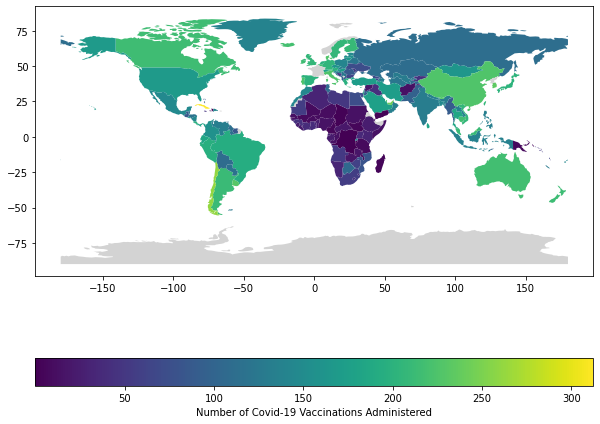

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries = countries.merge(vacc_total[['iso_code', 'total_vaccinations_per_hundred']], how = 'left',
                left_on = 'iso_a3', right_on = 'iso_code').drop('iso_code', axis=1)

fig, ax = plt.subplots(1, 1,figsize=(10,10))

countries.plot(column='total_vaccinations_per_hundred',legend=True,ax=ax, legend_kwds={'label': "Number of Covid-19 Vaccinations Administered",'orientation': "horizontal"},missing_kwds={"color": "lightgrey"})
plt.show()


Which is the most popular Vaccine?

In [ ]:
vacc_total = vacc.loc[vacc.groupby('country')['total_vaccinations'].idxmax()].sort_values('total_vaccinations',ascending=False)
vacc_total = pd.concat((vacc_total,vacc_total["vaccines"].str.split(", ", expand = True)),axis=1)

vacc_types = vacc_total.iloc[:,13:].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

print("The most popular vaccine is ", vacc_types.index[0], " with ", int(vacc_types[0]), " countries using it")


The most popular vaccine is  Oxford/AstraZeneca  with  183  countries using it


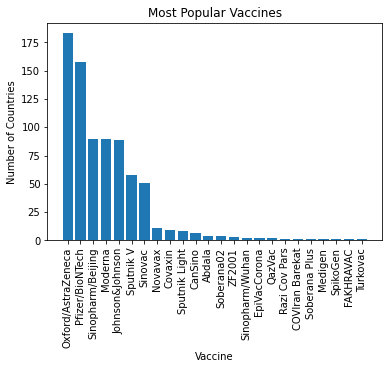

In [ ]:
plt.bar(vacc_types.index, vacc_types)
plt.xticks(rotation=90)
plt.title('Most Popular Vaccines')
plt.xlabel('Vaccine')
plt.ylabel('Number of Countries')
plt.show()

Which is the daily number of vaccinations administered in USA?

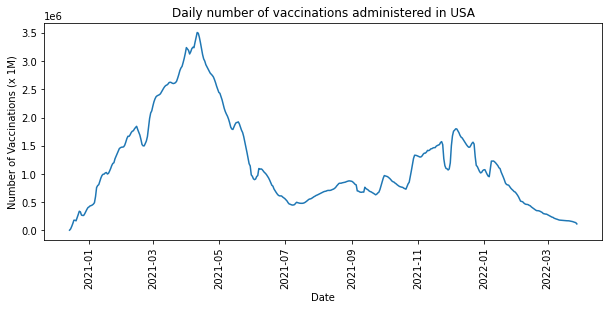

In [ ]:
us_stats = vacc[vacc.country == 'United States']

plt.figure(figsize=(10, 4)) 
plt.plot(us_stats.date, us_stats.daily_vaccinations)
plt.xticks(rotation=90)
plt.title('Daily number of vaccinations administered in USA')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations (x 1M)')
plt.show()

In [ ]:
us_stats_sliced = us_stats.loc[:,['total_vaccinations','date']]
us_stats_sliced.head(5)

total_vaccinations                      date
82360             30288.0 2020-12-13 00:00:00+00:00
82361             34867.0 2020-12-14 00:00:00+00:00
82362             84638.0 2020-12-15 00:00:00+00:00
82363            244549.0 2020-12-16 00:00:00+00:00
82364            517161.0 2020-12-17 00:00:00+00:00

convert all the dates into as the value 't', representing days since vaccinations started in the US

In [ ]:
us_stats_sliced["t"] = (us_stats_sliced['date'] - us_stats_sliced.date.iloc[0]).dt.days + 1
us_stats_sliced["t_squared"] = us_stats_sliced["t"]*us_stats_sliced["t"]
us_stats_sliced["log"] = np.log(us_stats_sliced["t"])
us_stats_sliced["exp"] = np.log(us_stats_sliced["total_vaccinations"])
us_stats_sliced["sqrt"] = np.sqrt(us_stats_sliced["t"])

partition the data into train & test in 80:20 ratio

In [ ]:
Train = us_stats_sliced.iloc[0:int(np.floor(0.8*len(us_stats_sliced))),:]
Test = us_stats_sliced.iloc[int(np.floor(0.8*len(us_stats_sliced))):,:]

Various models are built & trained to fit the data. Each of the RMSE scores are recorded for tabulation found below

In [ ]:
linear_model = smf.ols('total_vaccinations ~ t', data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['total_vaccinations'])-np.array(pred_linear))**2))

In [ ]:
Exp = smf.ols('exp ~ t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['total_vaccinations'])-np.array(np.exp(pred_Exp)))**2))


In [ ]:
Quad = smf.ols('total_vaccinations ~ t + t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['total_vaccinations'])-np.array(pred_Quad))**2))


In [ ]:
Log = smf.ols('total_vaccinations ~ log',data=Train).fit()
pred_Log = pd.Series(Log.predict(pd.DataFrame(Test[["log"]])))
rmse_Log = np.sqrt(np.mean((np.array(Test['total_vaccinations'])-np.array(pred_Log))**2))

# Testing trend on sqrt model
Sqrt = smf.ols('total_vaccinations ~ sqrt',data=Train).fit()
pred_Sqrt = pd.Series(Sqrt.predict(pd.DataFrame(Test[["sqrt"]])))
rmse_Sqrt = np.sqrt(np.mean((np.array(Test['total_vaccinations'])-np.array(pred_Sqrt))**2))

The RMSE scores:

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_Log","rmse_Sqrt"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_Log,rmse_Sqrt])}
table_rmse=pd.DataFrame(data)
table_rmse

MODEL   RMSE_Values
0  rmse_linear  6.271774e+07
1     rmse_Exp  1.818066e+09
2    rmse_Quad  6.585657e+07
3     rmse_Log  1.080144e+08
4    rmse_Sqrt  1.652783e+07

the best model to predict the cumulative vaccinations in the US is the quadratic model. The details of the quadratic model built is summarized below:

In [ ]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     9265.
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.12e-318
Time:                        14:56:23   Log-Likelihood:                -6886.4
No. Observations:                 376   AIC:                         1.378e+04
Df Residuals:                     373   BIC:                         1.379e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.229e+07    3.4e+06    -15.383      0.000    -5.9e+07   -4.56e+07
t           2.428e+06   4.16e+04     58.304      0.000    2.35e+06    2.51e+06
t_squared  -2758.2526    106.964    -25.787      0.000   -2968.581   -2547.924
==============================================================================
Omnibus:                      225.545   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.141
Skew:                           0.348   Prob(JB):                     2.85e-07
Kurtosis:                       1.801   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Preparation of input data for model prediction

In [ ]:
t_data = pd.Series(list(range(us_stats_sliced.t.iloc[-1] + 1, us_stats_sliced.t.iloc[-1] + 150)))

t_squared_data = t_data*t_data

pred_x = pd.DataFrame({'t':t_data, 't_squared':t_squared_data})

Prediction of when US will achieve herd immunity, where the first occurrence of total vaccination > 464m is identified

In [ ]:
pred_y = Quad.predict(pred_x)
days_after = (pred_y > 464000000).idxmax() + 1 # to offset the first index of 0
herd_date = us_stats.iloc[-1].date + datetime.timedelta(days=int(days_after))

print("The earliest date that the US will be able to achieve herd immunity is ", herd_date)

The earliest date that the US will be able to achieve herd immunity is  2022-03-29 00:00:00+00:00


In [ ]:
pred_y.index = pd.to_datetime(pred_y.index + 1, unit='D',origin=pd.Timestamp(us_stats.iloc[-1].date.tz_localize(None)))

plot the predictions in order to visualize it on top of the initial data

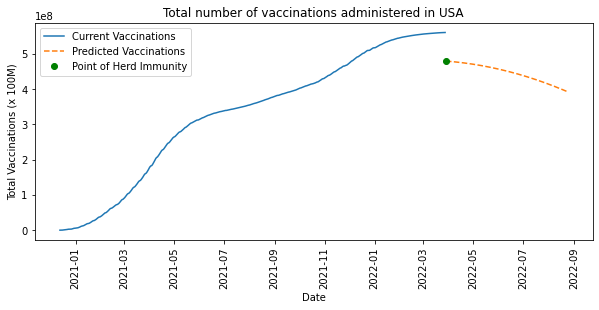

In [ ]:
plt.figure(figsize=(10, 4)) 
plt.plot(us_stats_sliced.date, us_stats_sliced.total_vaccinations, label="Current Vaccinations")
plt.plot(pred_y.index, pred_y,'--', label="Predicted Vaccinations")
plt.plot(herd_date,pred_y[herd_date.tz_localize(None)], 'go', label="Point of Herd Immunity")
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.title('Total number of vaccinations administered in USA')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations (x 100M)')
plt.show()